In [125]:
import numpy as np

cwd = os.getcwd()

print(cwd)

# np.savetxt('features_norm.csv', normalized_object_features, delimiter=',')
dataload = np.loadtxt('features_norm_new.csv', delimiter=',')

# X, y = np.array(dataload[:,1:6]) , dataload[:,0]

features_only = dataload

y_true = np.loadtxt('y_true.csv', dtype=str)

c:\Users\sebas\Documents\GitHub\GEO5017A2


In [126]:
#Redo myself, split data in train and predict manually. Just ot see if model works with multiple features, more than two!
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

X = features_only
y = y_true

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


classifier = svm.SVC(kernel='linear', C=1000)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.925

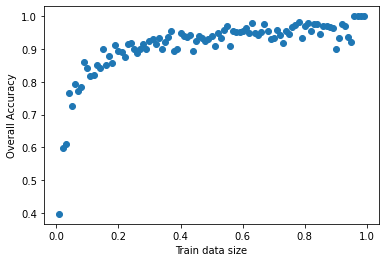

In [128]:

test_size_neg = []
test_size_record = []
AO = []

test_size = 0
while test_size < 0.99:
    test_size += 0.01
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    classifier = svm.SVC(kernel='rbf', C=1000,decision_function_shape='ovr')
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    test_size_record.append(test_size)
    AO.append(accuracy)
    test_size_neg.append(1-test_size)
    # print(test_size)


import matplotlib.pyplot as plt

plt.scatter(test_size_neg, AO)
plt.xlabel("Train data size")
plt.ylabel("Overall Accuracy")
plt.show()


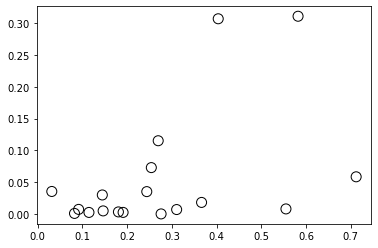

In [88]:
# classifier.support_vectors_[]
#not working
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.scatter(
    classifier.support_vectors_[:, 0],
    classifier.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

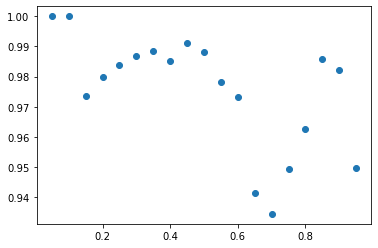

In [90]:
import matplotlib.pyplot as plt

plt.scatter(test_size_record, AO)
plt.show()

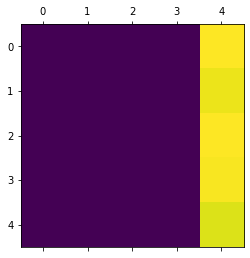

[[ 0  0  0  0 97]
 [ 0  0  0  0 94]
 [ 0  0  0  0 97]
 [ 0  0  0  0 96]
 [ 0  0  0  0 92]]


In [43]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

metrics.balanced_accuracy_score(y_test, y_pred)

a = metrics.confusion_matrix(y_test, y_pred)

plt.matshow(a)
plt.show()
print(a)

ValueError: cannot reshape array of size 450000 into shape (30,30)

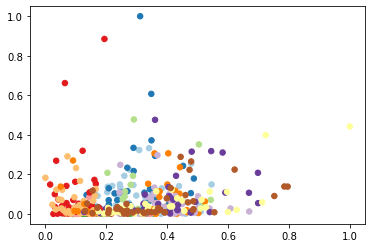

In [28]:
"""
=========================================
SVM: Maximum margin separating hyperplane
=========================================

Plot the maximum margin separating hyperplane within a two-class
separable dataset using a Support Vector Machine classifier with
linear kernel.

"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
# X, y = make_blobs(n_samples=40, centers=2, random_state=6)
X, y = np.array(dataload[:,1:3]) , dataload[:,0]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()
